# REMOVING ALL NULL VALUES AND CAPPING OUTLIERS

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import time
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint, uniform

In [67]:
pwd

'C:\\Users\\caspe'

In [49]:
df = pd.read_excel("LFB_dataset.xlsx")
(df.head())

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,000008-01012018,2018-01-01,2018,00:04:25,0,False Alarm,AFA,NaN,Non Residential,Mosque,...,348.0,Finchley,NaN,NaN,1.0,1.0,1,60,328,1.0
1,000009-01012018,2018-01-01,2018,00:04:30,0,False Alarm,AFA,NaN,Non Residential,Pub/wine bar/bar,...,144.0,Beckenham,NaN,NaN,1.0,1.0,1,60,328,1.0
2,000010-01012018,2018-01-01,2018,00:04:34,0,Fire,Secondary Fire,NaN,Outdoor Structure,Common external bin storage area,...,232.0,Southgate,NaN,NaN,1.0,1.0,1,60,328,1.0
3,000011-01012018,2018-01-01,2018,00:04:58,0,Special Service,Special Service,RTC,Road Vehicle,Multiple Vehicles,...,22.0,Enfield,NaN,NaN,1.0,1.0,1,60,328,1.0
4,000014-01012018,2018-01-01,2018,00:07:47,0,Fire,Primary Fire,NaN,Road Vehicle,Car,...,241.0,Stratford,NaN,NaN,1.0,1.0,1,60,328,6.0


In [50]:
columns_to_check = ['SecondPumpArriving_AttendanceTime', 'SecondPumpArriving_DeployedFromStation', 'SpecialServiceType','Postcode_full',
                    'Easting_m', 'Northing_m', 'Latitude', 'Longitude', 'IncGeo_WardCode', 'IncGeo_WardName', 'IncGeo_WardNameNew']
df.dropna(subset=columns_to_check, inplace=True)

In [51]:
# Check the structure of the dataset
df.info()

# Get basic statistics of the dataset
df.describe()

# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 16043 entries, 71 to 713331
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   IncidentNumber                          16043 non-null  object        
 1   DateOfCall                              16043 non-null  datetime64[ns]
 2   CalYear                                 16043 non-null  int64         
 3   TimeOfCall                              16043 non-null  object        
 4   HourOfCall                              16043 non-null  int64         
 5   IncidentGroup                           16043 non-null  object        
 6   StopCodeDescription                     16043 non-null  object        
 7   SpecialServiceType                      16043 non-null  object        
 8   PropertyCategory                        16043 non-null  object        
 9   PropertyType                            16043 non-nul

In [52]:
# Get basic statistics of the dataset
df.describe()

,DateOfCall,CalYear,HourOfCall,UPRN,USRN,Easting_m,Northing_m,Easting_rounded,Northing_rounded,Latitude,Longitude,FirstPumpArriving_AttendanceTime,SecondPumpArriving_AttendanceTime,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
count,16043,16043.000000,16043.000000,1.604300e+04,1.604300e+04,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000
mean,2021-01-10 04:53:09.129215488,2020.537805,13.154522,4.017944e+10,2.197618e+07,530848.427975,180686.172225,530848.871782,180686.707598,51.394284,-0.115431,319.197407,433.890295,1.792184,2.175154,2.213177,102.092751,601.090881,1.417254
min,2018-01-01 00:00:00,2018.000000,0.000000,5.000140e+06,4.200839e+06,503707.000000,157097.000000,503750.000000,157050.000000,0.000000,-0.508330,1.000000,1.000000,1.000000,2.000000,2.000000,60.000000,328.000000,1.000000
25%,2019-05-21 00:00:00,2019.000000,8.000000,2.070065e+08,2.050030e+07,523124.000000,175413.000000,523150.000000,175450.000000,51.463065,-0.226176,231.000000,314.000000,1.000000,2.000000,2.000000,60.000000,350.000000,1.000000
50%,2020-12-06 00:00:00,2020.000000,14.000000,1.002439e+10,2.120179e+07,531558.000000,181108.000000,531550.000000,181150.000000,51.514037,-0.105857,298.000000,400.000000,2.000000,2.000000,2.000000,68.000000,401.000000,1.000000
75%,2022-08-28 00:00:00,2022.000000,19.000000,1.000212e+11,2.210416e+07,539036.500000,186814.500000,539050.000000,186850.000000,51.563929,0.001515,381.000000,513.000000,2.000000,2.000000,2.000000,114.000000,672.000000,2.000000
max,2024-04-30 00:00:00,2024.000000,23.000000,2.000044e+11,9.999012e+07,560107.000000,200870.000000,560150.000000,200850.000000,51.691262,0.308525,1199.000000,1199.000000,6.000000,7.000000,25.000000,6559.000000,38479.000000,29.000000
std,NaN,1.879021,6.609959,5.524024e+10,1.026370e+07,11674.242034,8340.535000,11674.598887,8340.775946,2.438535,0.168184,142.073297,188.510983,0.654558,0.513125,0.681516,118.888508,698.657765,0.797816


In [53]:
# Define the columns that contain outliers and are numerical
numerical_cols = [
    'FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime',
    'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
    'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls'
]

# Function to cap outliers using IQR method
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    
    return df

# Cap outliers in the numerical columns
capped_df = cap_outliers_iqr(df.copy(), numerical_cols)

# Display the capped dataframe
print(capped_df.head())

      IncidentNumber DateOfCall  CalYear TimeOfCall  HourOfCall  \
71   000150-01012018 2018-01-01     2018   02:28:20           2   
81   000167-01012018 2018-01-01     2018   03:07:07           3   
132  000263-01012018 2018-01-01     2018   09:47:33           9   
263  000473-01012018 2018-01-01     2018   21:21:34          21   
272  000487-01012018 2018-01-01     2018   22:20:44          22   

       IncidentGroup StopCodeDescription SpecialServiceType PropertyCategory  \
71   Special Service     Special Service                RTC     Road Vehicle   
81   Special Service     Special Service                RTC     Road Vehicle   
132  Special Service     Special Service           Stand By         Aircraft   
263  Special Service     Special Service                RTC     Road Vehicle   
272  Special Service     Special Service                RTC     Road Vehicle   

           PropertyType  ... FirstPumpArriving_AttendanceTime  \
71   Multiple Vehicles   ...                       

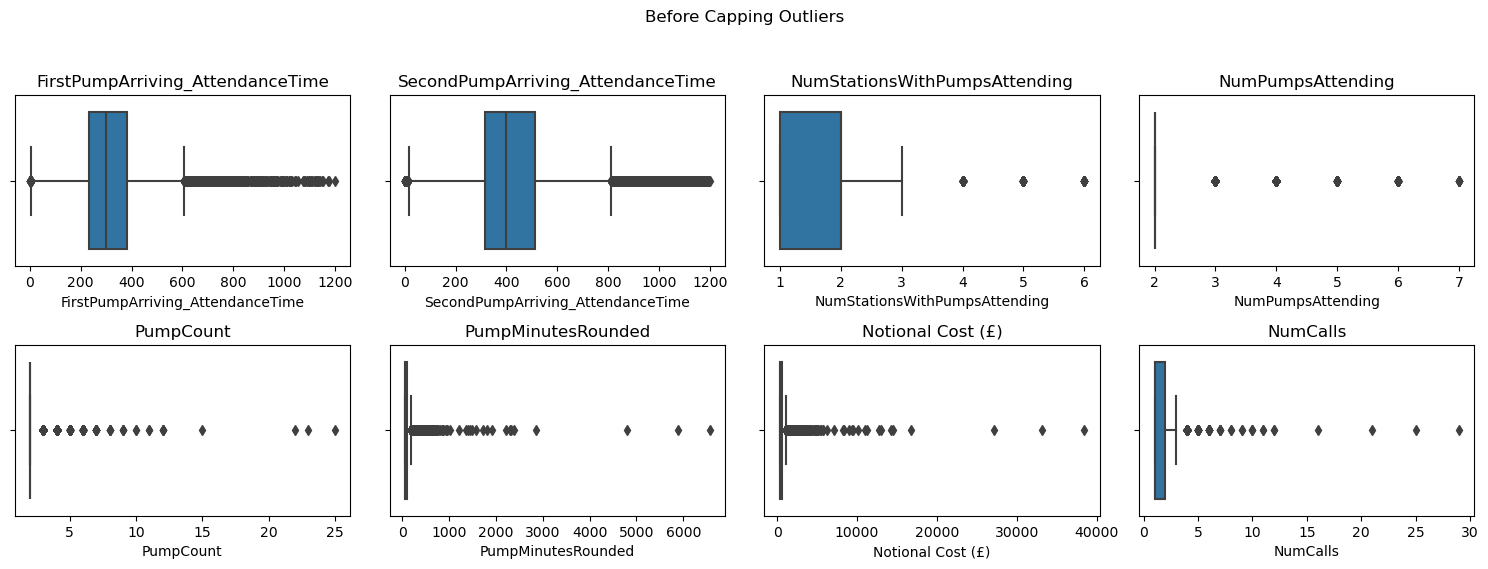

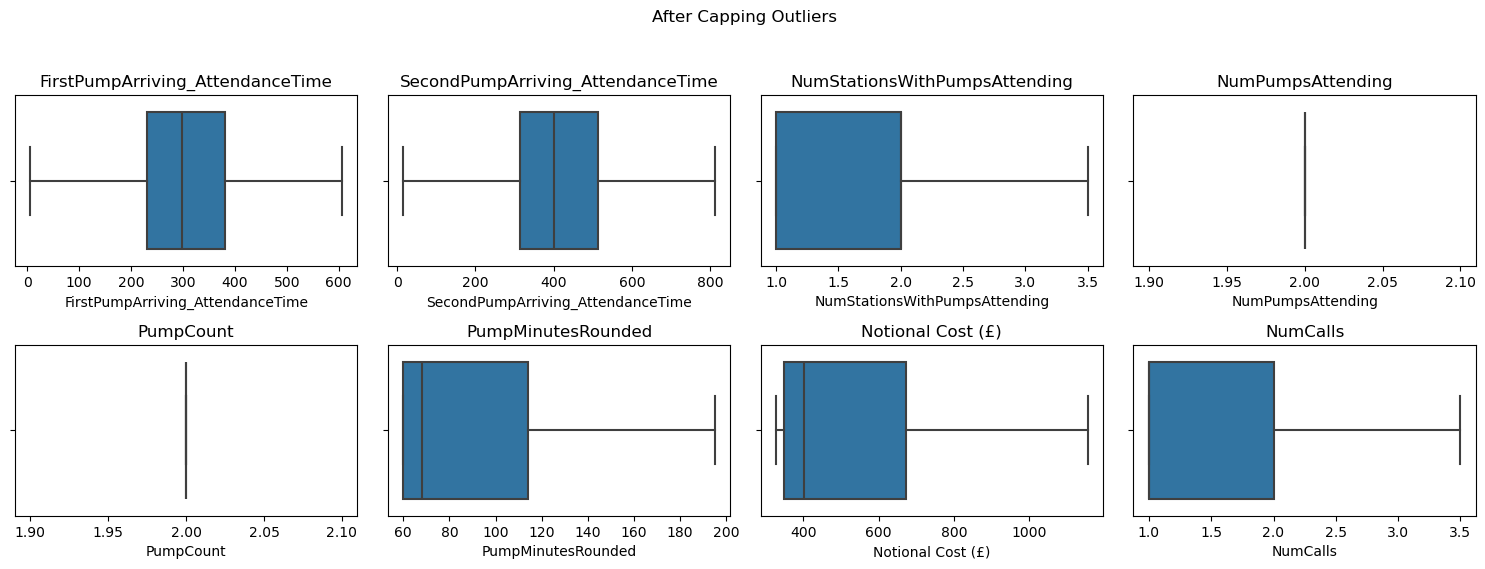

In [54]:
def plot_boxplots(df, columns, title):
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(columns, 1):
        plt.subplot(4, 4, i)
        sns.boxplot(x=df[col])
        plt.title(col)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

# Plot boxplots before capping outliers
plot_boxplots(df, numerical_cols, "Before Capping Outliers")

# Plot boxplots after capping outliers
plot_boxplots(capped_df, numerical_cols, "After Capping Outliers")

In [55]:
print(capped_df.isnull().sum())

IncidentNumber                            0
DateOfCall                                0
CalYear                                   0
TimeOfCall                                0
HourOfCall                                0
IncidentGroup                             0
StopCodeDescription                       0
SpecialServiceType                        0
PropertyCategory                          0
PropertyType                              0
AddressQualifier                          0
Postcode_full                             0
Postcode_district                         0
UPRN                                      0
USRN                                      0
IncGeo_BoroughCode                        0
IncGeo_BoroughName                        0
ProperCase                                0
IncGeo_WardCode                           0
IncGeo_WardName                           0
IncGeo_WardNameNew                        0
Easting_m                                 0
Northing_m                      

In [56]:
# Standardize categorical variables
capped_df['IncidentGroup'] = capped_df['IncidentGroup'].astype('category')
capped_df['StopCodeDescription'] = capped_df['StopCodeDescription'].astype('category')
capped_df['SpecialServiceType'] = capped_df['SpecialServiceType'].astype('category')
capped_df['PropertyCategory'] = capped_df['PropertyCategory'].astype('category')
capped_df['PropertyType'] = capped_df['PropertyType'].astype('category')

In [57]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical features
scaler = StandardScaler()
capped_df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']] = scaler.fit_transform(
    capped_df[['FirstPumpArriving_AttendanceTime', 'SecondPumpArriving_AttendanceTime']]
)

# Encode categorical variables
label_encoders = {}
for column in ['IncidentGroup', 'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory', 'PropertyType']:
    label_encoders[column] = LabelEncoder()
    capped_df[column] = label_encoders[column].fit_transform(capped_df[column])

In [58]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}
for column in capped_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    capped_df[column] = le.fit_transform(capped_df[column].astype(str))
    label_encoders[column] = le

from sklearn.impute import SimpleImputer

num_cols = capped_df.select_dtypes(include=['float64', 'int64']).columns
capped_df['NumCalls'].fillna(capped_df['NumCalls'].median(), inplace=True)

# Impute numerical columns with the median
imputer_num = SimpleImputer(strategy='median')
capped_df[num_cols] = imputer_num.fit_transform(capped_df[num_cols])

capped_df.head()

,IncidentNumber,DateOfCall,CalYear,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,...,FirstPumpArriving_AttendanceTime,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
71,3,2018-01-01,2018.0,1268,2.0,0,0,13,7,104,...,-1.130018,24,-0.763134,24,2.0,2.0,2.0,134.0,733.0,1.0
81,6,2018-01-01,2018.0,1494,3.0,0,0,13,7,26,...,-0.026368,98,1.143764,39,2.0,2.0,2.0,60.0,328.0,1.0
132,18,2018-01-01,2018.0,4211,9.0,0,0,17,0,136,...,-0.415892,38,2.091216,37,3.5,2.0,2.0,195.0,1155.0,1.0
263,29,2018-01-01,2018.0,12611,21.0,0,0,13,7,26,...,-0.618768,81,0.130349,29,2.0,2.0,2.0,60.0,328.0,1.0
272,31,2018-01-01,2018.0,13325,22.0,0,0,13,7,26,...,-0.034483,15,-0.571245,15,1.0,2.0,2.0,161.0,880.0,1.0


In [59]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = capped_df.drop([ 'FirstPumpArriving_AttendanceTime', 'DateOfCall', 'CalYear'], axis=1)
y = capped_df['FirstPumpArriving_AttendanceTime']


# Verify the data types
print(X.dtypes)
print(y.dtypes)


IncidentNumber                              int32
TimeOfCall                                  int32
HourOfCall                                float64
IncidentGroup                               int32
StopCodeDescription                         int32
SpecialServiceType                          int32
PropertyCategory                            int32
PropertyType                                int32
AddressQualifier                            int32
Postcode_full                               int32
Postcode_district                           int32
UPRN                                      float64
USRN                                      float64
IncGeo_BoroughCode                          int32
IncGeo_BoroughName                          int32
ProperCase                                  int32
IncGeo_WardCode                             int32
IncGeo_WardName                             int32
IncGeo_WardNameNew                          int32
Easting_m                                 float64


In [60]:
# STANDARDIZING THE DATA SO AS THEY HAVE EQUAL CONTRIBUTION TO THE MODEL
# Fit scaler on Random Under Sampling data
norm = MinMaxScaler().fit(X)
# Transform training data
X_norm = norm.transform(X)

X_norm = pd.DataFrame(norm.transform(X), columns=X.columns)

X_norm.head()

,IncidentNumber,TimeOfCall,HourOfCall,IncidentGroup,StopCodeDescription,SpecialServiceType,PropertyCategory,PropertyType,AddressQualifier,Postcode_full,...,IncidentStationGround,FirstPumpArriving_DeployedFromStation,SecondPumpArriving_AttendanceTime,SecondPumpArriving_DeployedFromStation,NumStationsWithPumpsAttending,NumPumpsAttending,PumpCount,PumpMinutesRounded,Notional Cost (£),NumCalls
0,0.000187,0.087660,0.086957,0.0,0.0,0.684211,1.0,0.502415,0.2,0.645579,...,0.237624,0.237624,0.356156,0.237624,0.4,0.0,0.0,0.548148,0.489722,0.0
1,0.000374,0.103284,0.130435,0.0,0.0,0.684211,1.0,0.125604,0.2,0.490031,...,0.970297,0.970297,0.755653,0.386139,0.4,0.0,0.0,0.000000,0.000000,0.0
2,0.001122,0.291116,0.391304,0.0,0.0,0.894737,0.0,0.657005,0.8,0.859258,...,0.376238,0.376238,0.954146,0.366337,1.0,0.0,0.0,1.000000,1.000000,0.0
3,0.001808,0.871829,0.913043,0.0,0.0,0.684211,1.0,0.125604,0.1,0.410196,...,0.801980,0.801980,0.543342,0.287129,0.4,0.0,0.0,0.000000,0.000000,0.0
4,0.001932,0.921189,0.956522,0.0,0.0,0.684211,1.0,0.125604,0.2,0.053924,...,0.148515,0.148515,0.396357,0.148515,0.0,0.0,0.0,0.748148,0.667473,0.0


In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42, shuffle = False)

In [20]:

# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, val_loss):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds")
    print(f"  Validation Loss (MSE): {val_loss}\n")

# Linear Regression
start_time = time.time()
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)
end_time = time.time()
val_loss_lr = -cross_val_score(lin_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_lr, "Linear Regression", start_time, end_time, val_loss_lr)

# Random Forest
start_time = time.time()
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
end_time = time.time()
val_loss_rf = -cross_val_score(rf_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_rf, "Random Forest", start_time, end_time, val_loss_rf)

# Gradient Boosting Machine
start_time = time.time()
gbm_reg = GradientBoostingRegressor(random_state=42)
gbm_reg.fit(X_train, y_train)
y_pred_gbm = gbm_reg.predict(X_test)
end_time = time.time()
val_loss_gbm = -cross_val_score(gbm_reg, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_gbm, "Gradient Boosting Machine", start_time, end_time, val_loss_gbm)

# XGBoost
start_time = time.time()
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
end_time = time.time()
val_loss_xgb = -cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error').mean()
print_evaluation_metrics(y_test, y_pred_xgb, "XGBoost", start_time, end_time, val_loss_xgb)

Linear Regression Evaluation Metrics:
  MSE: 0.5815489413055416
  RMSE: 0.7625935623289392
  MAE: 0.577847635639832
  R^2: 0.45169989608859895
  Time Taken: 0.02 seconds
  Validation Loss (MSE): 0.5357244128788773

Random Forest Evaluation Metrics:
  MSE: 0.5412892076476162
  RMSE: 0.7357235945976017
  MAE: 0.5473416803323958
  R^2: 0.4896578641635302
  Time Taken: 29.25 seconds
  Validation Loss (MSE): 0.49997826441736803

Gradient Boosting Machine Evaluation Metrics:
  MSE: 0.5389553400541953
  RMSE: 0.7341357776693596
  MAE: 0.54762805621617
  R^2: 0.4918582977867355
  Time Taken: 6.31 seconds
  Validation Loss (MSE): 0.4882600307190758

XGBoost Evaluation Metrics:
  MSE: 0.5133749874746206
  RMSE: 0.716501910307726
  MAE: 0.5222990239828766
  R^2: 0.5159761475174636
  Time Taken: 0.34 seconds
  Validation Loss (MSE): 0.4973511072622283



In [21]:
# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, val_loss):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds")
    print(f"  Validation Loss (MSE): {val_loss}\n")

# MLP (Modified with Timing and Validation Loss)
start_time_mlp = time.time()

# Define the neural network model (MLP)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],))) 
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Train the model with validation split
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

# Get the final validation loss from the training history
val_loss_mlp = history.history['val_loss'][-1]

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp, val_loss_mlp)

Epoch 1/50


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9539 - val_loss: 0.6686
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.6451 - val_loss: 0.5966
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - loss: 0.6105 - val_loss: 0.5718
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - loss: 0.5800 - val_loss: 0.5622
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - loss: 0.5495 - val_loss: 0.5539
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 0.5423 - val_loss: 0.5485
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step - loss: 0.5457 - val_loss: 0.5536
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - loss: 0.5240 - val_loss: 0.5606
Epoch 9/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.5368 - val_loss: 0.5516
Epoch 10/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4964 - val_loss: 0.5448
Epoch 11/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.5126 - val_loss: 0.5340
Epoch 12/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Reshape data for LSTM [samples, time steps, features]
# For simplicity, we assume a time step of 1
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Verify the shapes of the data
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Building the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Training the model with early stopping
start_time = time.time()
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)
end_time = time.time()

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluation Metrics
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time

    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds\n")

# Print the evaluation metrics
print_evaluation_metrics(y_test, y_pred_test, "LSTM", start_time, end_time)


X_train shape: (12834, 1, 36)
X_test shape: (3209, 1, 36)
y_train shape: (12834,)
y_test shape: (3209,)


C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8656 - val_loss: 0.6182
Epoch 2/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5735 - val_loss: 0.5631
Epoch 3/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5458 - val_loss: 0.5658
Epoch 4/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5469 - val_loss: 0.5716
Epoch 5/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5348 - val_loss: 0.6063
Epoch 6/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5232 - val_loss: 0.5631
Epoch 7/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5280 - val_loss: 0.5790
Epoch 8/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5506 - val_loss: 0.5641
Epoch 9/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5161 - val_loss: 0.5597
Epoch 10/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5231 - val_loss: 0.5764
Epoch 11/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5349 - val_loss: 0.5651
Epoch 12/50
321/321 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

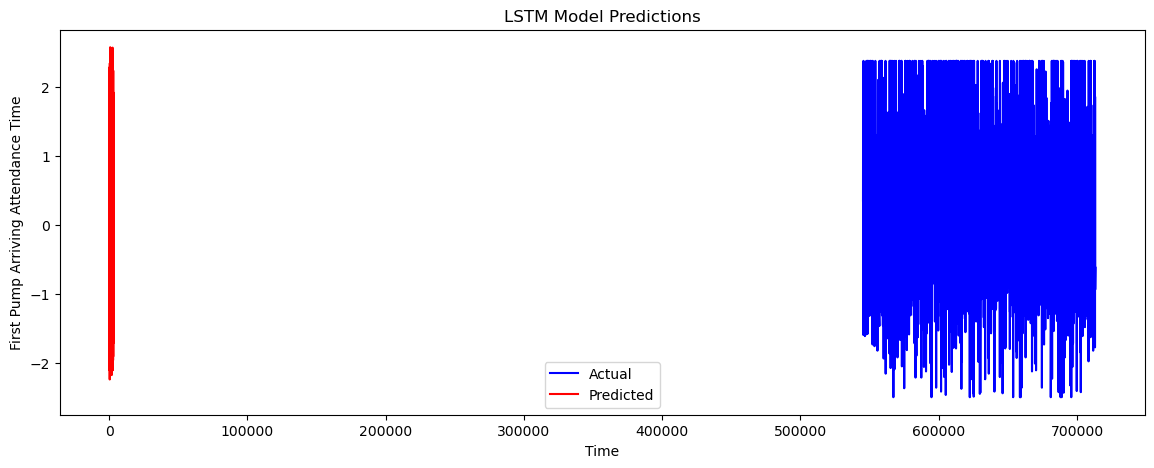

In [63]:
# Plotting the results
plt.figure(figsize=(14, 5))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred_test, color='red', label='Predicted')
plt.title('LSTM Model Predictions')
plt.xlabel('Time')
plt.ylabel('First Pump Arriving Attendance Time')
plt.legend()
plt.show()

In [28]:
from sklearn.inspection import permutation_importance
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Function to print evaluation metrics and time taken
def print_evaluation_metrics(y_true, y_pred, model_name, start_time, end_time, val_loss):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    time_taken = end_time - start_time
    
    print(f"{model_name} Evaluation Metrics:")
    print(f"  MSE: {mse}")
    print(f"  RMSE: {rmse}")
    print(f"  MAE: {mae}")
    print(f"  R^2: {r2}")
    print(f"  Time Taken: {time_taken:.2f} seconds")
    print(f"  Validation Loss (MSE): {val_loss}\n")

# MLP (Modified with Timing and Validation Loss)
start_time_mlp = time.time()

# Define the neural network model (MLP) with regularization
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.4))  # Increased dropout to 40%
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(1))

# Compile the model
model.compile(loss='mse', optimizer='adam')

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with validation split
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)

# Predict on the test set
y_pred_mlp = model.predict(X_test)

end_time_mlp = time.time()

# Get the final validation loss from the training history
val_loss_mlp = history.history['val_loss'][-1]

print_evaluation_metrics(y_test, y_pred_mlp, "MLP (Neural Network)", start_time_mlp, end_time_mlp, val_loss_mlp)

C:\Users\caspe\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0393 - val_loss: 0.7465
Epoch 2/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 0.7892 - val_loss: 0.6505
Epoch 3/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.7108 - val_loss: 0.6304
Epoch 4/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 0.6768 - val_loss: 0.6241
Epoch 5/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 941us/step - loss: 0.6402 - val_loss: 0.6025
Epoch 6/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 0.6146 - val_loss: 0.6108
Epoch 7/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.6352 - val_loss: 0.6012
Epoch 8/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.6153 - val_loss: 0.6002
Epoch 9/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 0.6040 - val_loss: 0.5875
Epoch 10/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 0.5793 - val_loss: 0.5891
Epoch 11/100
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.5945 - val_loss: 0.5910
Epoch 12/100
321/321 